<a href="https://colab.research.google.com/github/WIEM-MOOT-HAD/seasame_ouvre_toi/blob/main/sesame_ouvre_toi_ML%2BSHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Set up colab and dataset

In [18]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# install librairies
!pip install pycaret
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#import librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
import shap
from datetime import datetime
from datetime import date
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#import data
data1 = pd.read_csv("/content/drive/MyDrive/Sesame_ouvre_toi/data/compas-scores-raw.csv")

###### Some features Ingineering

In [22]:
#drop unusuful columns: 
data1.drop(['Person_ID','AssessmentID', 'Case_ID','LastName','FirstName', 'MiddleName', 'ScaleSet_ID','Scale_ID', "AssessmentReason",
           "Screening_Date","IsCompleted","IsDeleted"],
           axis=1, inplace=True)

In [23]:
data1.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Violence,-2.08,4,Low,New
1,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Recidivism,-1.06,2,Low,New
2,PRETRIAL,Male,Caucasian,12/05/92,Risk and Prescreen,English,Pretrial,Jail Inmate,Single,1,Low,Risk of Failure to Appear,15.00,1,Low,New
3,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Violence,-2.84,2,Low,New
4,PRETRIAL,Male,Caucasian,09/16/84,Risk and Prescreen,English,Pretrial,Jail Inmate,Married,1,Low,Risk of Recidivism,-1.50,1,Low,New


In [24]:
#manage ethnic code text column:
data1['Ethnic_Code_Text'].replace('African-Am','African-American')
data1['Ethnic_Code_Text'].replace('Arabic','Arabic-Oriental')
data1['Ethnic_Code_Text'].replace('Oriental','Arabic-Oriental')
data1['Ethnic_Code_Text'].value_counts()

African-American    27018
Caucasian           21783
Hispanic             8742
Other                2592
Asian                 324
Native American       219
Arabic                 75
African-Am             51
Oriental               39
Name: Ethnic_Code_Text, dtype: int64

In [25]:
# drop nan values in "ScoreText" column
data1 = data1.dropna(subset=["ScoreText"])

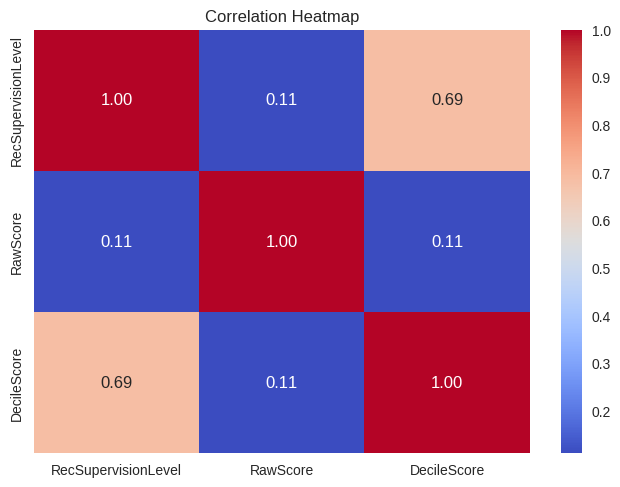

In [26]:
# show correlation matrix 
heatmap_data = data1

corr_matrix = heatmap_data.corr()

fig, ax = plt.subplots()
heatmap = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Correlation Heatmap')

plt.show()

#### Auto ML using pycaret https://pycaret.org/

###### Train test split

In [12]:
# define features and target
X = data1.drop(["ScoreText","DecileScore"], axis = 1)
y = data1["ScoreText"]

In [13]:
# split data into train and test set with test size=33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### Classification using pycaret

In [13]:
s = setup(data= X_train, target = y_train, session_id = 123)

,Description,Value
0,Session id,123
1,Target,ScoreText
2,Target type,Multiclass
3,Target mapping,"High: 0, Low: 1, Medium: 2"
4,Original data shape,"(40734, 15)"
5,Transformed data shape,"(40734, 48)"
6,Transformed train set shape,"(28513, 48)"
7,Transformed test set shape,"(12221, 48)"
8,Ordinal features,4
9,Numeric features,2


In [14]:
# functional API
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9973,1.0000,0.9973,0.9973,0.9973,0.9943,0.9943,19.3780
gbc,Gradient Boosting Classifier,0.9955,0.9999,0.9955,0.9956,0.9956,0.9907,0.9907,13.0090
lightgbm,Light Gradient Boosting Machine,0.9950,0.9999,0.9950,0.9951,0.9950,0.9896,0.9896,2.8730
dt,Decision Tree Classifier,0.9930,0.9937,0.9930,0.9930,0.9929,0.9853,0.9853,1.2820
rf,Random Forest Classifier,0.9797,0.9989,0.9797,0.9797,0.9797,0.9575,0.9576,3.6970
knn,K Neighbors Classifier,0.9708,0.9928,0.9708,0.9706,0.9706,0.9387,0.9388,2.6070
et,Extra Trees Classifier,0.9359,0.9913,0.9359,0.9346,0.9347,0.8635,0.8644,4.4080
lr,Logistic Regression,0.8917,0.9749,0.8917,0.8873,0.8883,0.7662,0.7683,11.2130
svm,SVM - Linear Kernel,0.8691,0.0000,0.8691,0.8626,0.8617,0.7134,0.7189,2.0260
ada,Ada Boost Classifier,0.8367,0.9523,0.8367,0.8455,0.8392,0.6572,0.6581,2.2680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

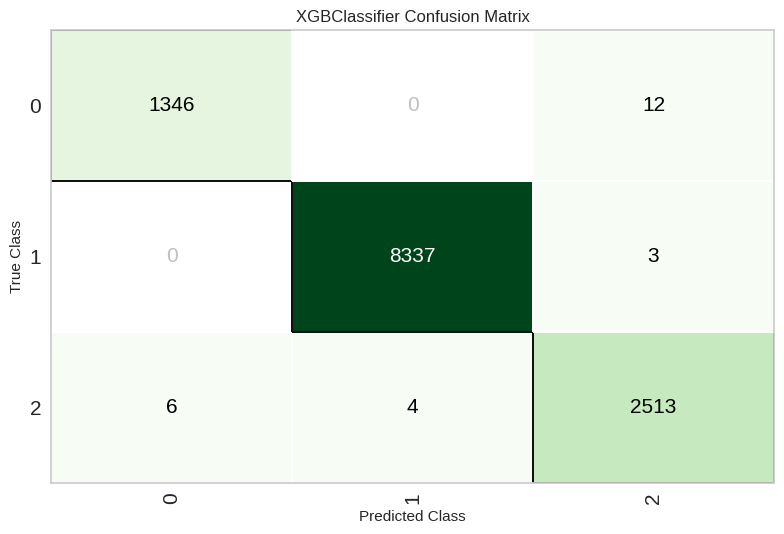

In [15]:
# functional API
plot_model(best, plot = 'confusion_matrix')

###### Explane results using shap

In [2]:
best_model = automl(optimize='Accuracy')#.best_model

NameError: ignored

In [29]:
explainer_best_model = shap.Explainer(best_model,x_train)

In [30]:
shap_values = explainer_best_model.shap_values(x_train,check_additivity=False )

100%|===================| 122028/122202 [09:16<00:00]       

In [14]:
shap.summary_plot(shap_values, x_train)#, feature_names=X_train.feature_names)

NameError: ignored

#### Random Forest

###### Prepare data

In [27]:
# encode columns using label encoder 
le = preprocessing.LabelEncoder()

In [28]:
data1["Agency_Text"] = le.fit_transform(data1["Agency_Text"])
data1["Sex_Code_Text"] = le.fit_transform(data1["Sex_Code_Text"])
data1["Ethnic_Code_Text"] = le.fit_transform(data1["Ethnic_Code_Text"])
data1["RecSupervisionLevelText"] = le.fit_transform(data1["RecSupervisionLevelText"])
data1["ScaleSet"] = le.fit_transform(data1["ScaleSet"])
data1["Language"] = le.fit_transform(data1["Language"])
data1["LegalStatus"] = le.fit_transform(data1["LegalStatus"])
data1["CustodyStatus"] = le.fit_transform(data1["CustodyStatus"])
data1["MaritalStatus"] = le.fit_transform(data1["MaritalStatus"])
data1["DisplayText"] = le.fit_transform(data1["DisplayText"])
data1["ScoreText"] = le.fit_transform(data1["ScoreText"])
data1["AssessmentType"] = le.fit_transform(data1["AssessmentType"])

In [29]:
data1.head()

,Agency_Text,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,Language,LegalStatus,CustodyStatus,MaritalStatus,RecSupervisionLevel,RecSupervisionLevelText,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,2,1,4,12/05/92,1,0,5,0,4,1,1,2,-2.08,4,1,1
1,2,1,4,12/05/92,1,0,5,0,4,1,1,1,-1.06,2,1,1
2,2,1,4,12/05/92,1,0,5,0,4,1,1,0,15.00,1,1,1
3,2,1,4,09/16/84,1,0,5,0,1,1,1,2,-2.84,2,1,1
4,2,1,4,09/16/84,1,0,5,0,1,1,1,1,-1.50,1,1,1


In [30]:
# Random Forest Classifier
clf = RandomForestClassifier()

In [31]:
# define target and features
x = data1.drop(["ScoreText", "DateOfBirth", "DecileScore", "RawScore"], axis =1) 
y = data1["ScoreText"]

###### Train test split

In [32]:
# Train test split using new features   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

###### Fit model and make prediction

In [33]:
# Fit model to make prediction 
y_predict = clf.fit(x_train, y_train).predict(x_test)

###### Reporting

In [34]:
# Classification report 
report_df = pd.DataFrame.from_dict(classification_report(y_test, y_predict, output_dict=True)).transpose()

In [35]:
report_df

,precision,recall,f1-score,support
0,0.899845,0.759477,0.823724,2295.000000
1,0.845207,0.942947,0.891406,13689.000000
2,0.686515,0.480392,0.565249,4080.000000
accuracy,0.827901,0.827901,0.827901,0.827901
macro avg,0.810522,0.727605,0.760126,20064.000000
weighted avg,0.819187,0.827901,0.817340,20064.000000


<Axes: >

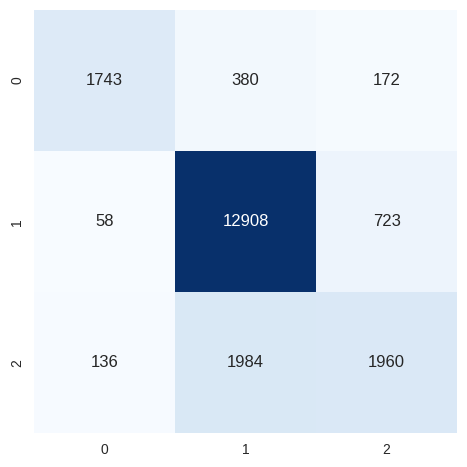

In [36]:
#confusion matrix
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

In [37]:
precision = precision_score(y_test, y_predict,average='macro')
recall = recall_score(y_test, y_predict,average='macro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8105223073670788
Recall: 0.7276053909035306


###### Explane results using Shap

In [38]:
explainer = shap.Explainer(clf,x_train)

In [ ]:
shap_values = explainer.shap_values(x_test)

 11%|==                  | 6574/60192 [08:26<68:46]       

In [ ]:
shap.summary_plot(shap_values, x_test)#, feature_names=X_train.feature_names)

#### XGBoost

###### Fit model and make prediction

In [38]:
model_xgb = XGBClassifier()

In [39]:
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [40]:
y_pred = model_xgb.predict(x_test)

###### Reporting

In [41]:
accuracy = model_xgb.score(x_test, y_test)

In [43]:
report_xgb = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).transpose()

In [44]:
report_xgb

,precision,recall,f1-score,support
0,0.915478,0.755120,0.827603,2295.000000
1,0.845039,0.950106,0.894498,13689.000000
2,0.712950,0.485784,0.577843,4080.000000
accuracy,0.833383,0.833383,0.833383,0.833383
macro avg,0.824489,0.730337,0.766648,20064.000000
weighted avg,0.826236,0.833383,0.822455,20064.000000


<Axes: >

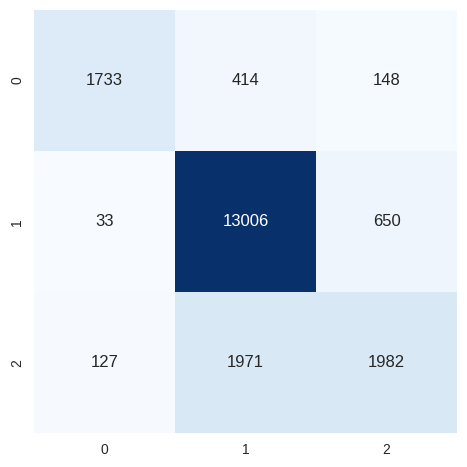

In [45]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')

###### Explane results using Shap

In [48]:
explainer_xgb = shap.Explainer(model_xgb,x_train)

In [49]:
shap_values = explainer_xgb.shap_values(x_test)

100%|===================| 60169/60192 [13:34<00:00]       

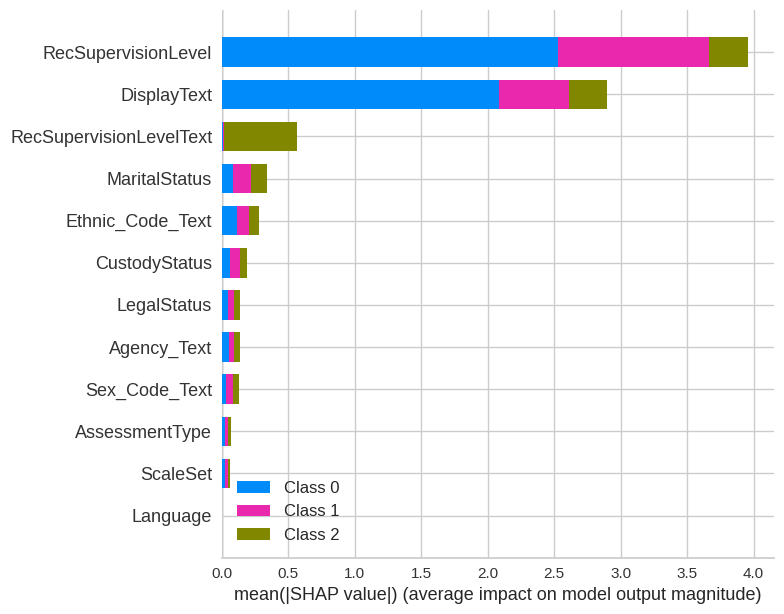

In [52]:
shap.summary_plot(shap_values, x_test)

In [17]:
index=1
tree_explainer = shap.TreeExplainer(model_xgb)
tree_values = tree_explainer.shap_values(x_train)
tree_values_array = np.array(tree_values)

print("Predicted value is:", y_pred[index])
shap_force_plot(tree_explainer, tree_values_array[index, :], x_train.iloc[index, :])


NameError: ignored

###### Shap

In [ ]:
tree_explainer = shap.TreeExplainer(model_xgb)
tree_values = tree_explainer.shap_values(x_train)

In [ ]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=1)
    importance_df = pd.DataFrame([X.columns, shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 

In [ ]:
shap_feature_importance(tree_values, x_train)

,column_name,shap_importance
0,Agency_Text,"[0.054492056369781494, 0.04301374778151512, 0...."
1,Sex_Code_Text,"[0.04009751230478287, 0.054409634321928024, 0...."
2,Ethnic_Code_Text,"[0.036023177206516266, 0.046500008553266525, 0..."
3,ScaleSet,None
4,Language,None
5,LegalStatus,None
6,CustodyStatus,None
7,MaritalStatus,None
8,RecSupervisionLevel,None
9,RecSupervisionLevelText,None


In [ ]:
x_train.shape

(40734, 12)

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(model_xgb, x_train)

In [ ]:
# Compute SHAP values
shap_values = explainer.shap_values(x_train)

100%|===================| 122167/122202 [26:35<00:00]       

In [ ]:
shap_values_np = np.array(shap_values)

In [ ]:
feature_importance = pd.DataFrame({'Feature': aa, 'Importance': np.mean(shap_values_reshaped, axis=0)})

ValueError: ignored

In [ ]:
# Calculate feature importance as absolute mean SHAP values
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': shap_values_np.mean(axis=1)})

ValueError: ignored

In [ ]:
# Sort the feature importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



In [ ]:
# Display the feature importance dataframe
print(feature_importance)

In [ ]:
explainer = shap.Explainer(model_xgb,x_train)

In [ ]:
#X_test = X_train[:10]  # Example test data
shap_values = explainer.shap_values(x_test)

100%|===================| 60173/60192 [13:04<00:00]       

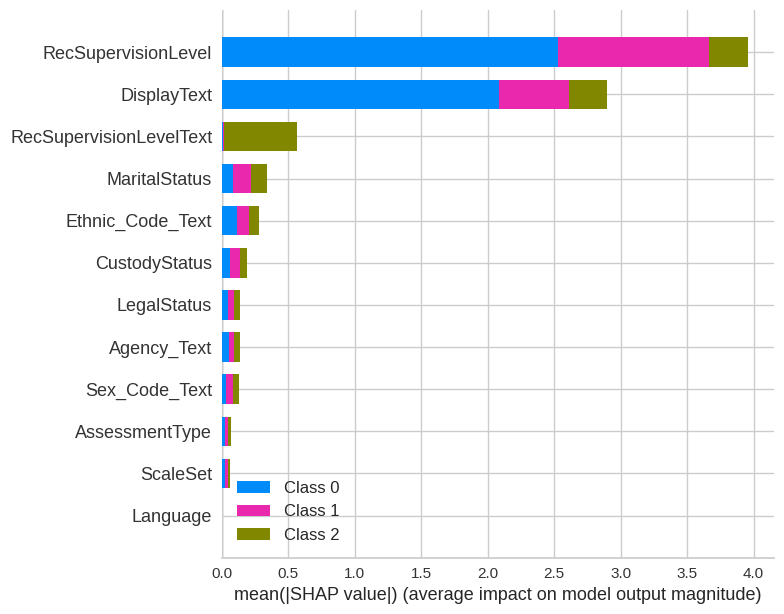

In [ ]:
shap.summary_plot(shap_values, x_test)

In [ ]:
def shap_feature_importance_plot(values, X):
    shap.summary_plot(tree_values, X)
    return

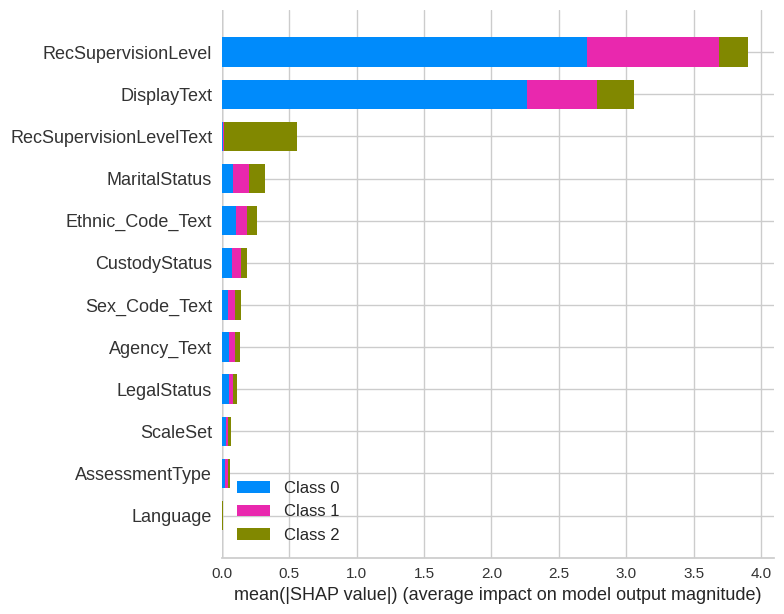

In [ ]:
shap_feature_importance_plot(tree_values, x_train)

In [54]:
tree_explainer = shap.TreeExplainer(model_xgb)

In [57]:
tree_values = tree_explainer.shap_values(x_train)

In [58]:
def shap_force_plot(explainer, values, X):
    """
    shap_value can be an element of explainer.shap_values(train_X) or subset
    """
    shap.initjs()
    display(shap.force_plot(explainer.expected_value, values, X))
    return


In [65]:
index = 3
print("Real value is :",y_train[index])
print("Predicted value is :", y_pred[index])
shap_force_plot(tree_explainer, tree_values[index,:], X_train.iloc[index,:])

Real value is : 1
Predicted value is : 1


TypeError: ignored

In [ ]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=0)
    importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 


In [ ]:
shap_feature_importance(tree_values, X_train)

In [70]:
def shap_feature_importance(values, X):
    shap_sum = np.abs(values).mean(axis=0)
    importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
    importance_df.columns = ['column_name', 'shap_importance']
    importance_df = importance_df.sort_values('shap_importance', ascending=False)
    return importance_df 

In [71]:
shap_feature_importance(tree_values, x_train)

,column_name,shap_importance
32181,None,"[0.876227080821991, 0.07581447809934616, 0.103..."
17980,None,"[0.7998425364494324, 0.037973854690790176, 0.0..."
5017,None,"[0.7631092071533203, 0.031687427312135696, 0.0..."
19008,None,"[0.7555252909660339, 0.02595943957567215, 0.15..."
12936,None,"[0.7548548579216003, 0.0751953199505806, 0.128..."
...,...,...
20238,None,"[0.00218165572732687, 0.05677661672234535, 0.0..."
4648,None,"[0.00218165572732687, 0.05677661672234535, 0.0..."
26661,None,"[0.00218165572732687, 0.05677661672234535, 0.0..."
22103,None,"[0.00218165572732687, 0.05677661672234535, 0.0..."


In [72]:

def shap_dependance_plot(feature1, values, X, feature2 = None):
    if feature2 is None:
        shap.dependence_plot(feature1, values, X)
    else :
        shap.dependence_plot(feature1, values, X, interaction_index=feature2)
    return


In [73]:
for feature in shap_feature_importance(tree_values, x_train).column_name.tolist():
    shap_dependance_plot(feature, tree_values, X_train)

TypeError: ignored